# Data-X Spring 2018: Homework 04

### Entropy, Natural Language Processing, SQL


Write a sentence describing this assignment here.

### Part 1: Entropy

**Q 1.1:**

| HasJob   |                                       |
| -------- |:-------------------------------------:|
| HasJob=1 | P(Defaulter=1)     | $ \frac{2}{5} $  |
| HasJob=1 | P(Defaulter=0)     | $ \frac{3}{5} $  |
| HasJob=0 | P(Defaulter=1)     | $ \frac{2}{3} $  |
| HasJob=0 | P(Defaulter=0)     | $ \frac{1}{3} $  |


| HasFamily   |                                       |
| ----------- |:-------------------------------------:|
| HasFamily=1 | P(Defaulter=1)     | $ \frac{1}{4} $  |
| HasFamily=1 | P(Defaulter=0)     | $ \frac{3}{4} $  |
| HasFamily=0 | P(Defaulter=1)     | $ \frac{3}{4} $  |
| HasFamily=0 | P(Defaulter=0)     | $ \frac{1}{4} $  |

| IsAbove30years   |                                       |
| ---------------- |:-------------------------------------:|
| IsAbove30years=1 | P(Defaulter=1)     | $ \frac{1}{2} $  |
| IsAbove30years=1 | P(Defaulter=0)     | $ \frac{1}{2} $  |
| IsAbove30years=0 | P(Defaulter=1)     | $ \frac{1}{2} $  |
| IsAbove30years=0 | P(Defaulter=0)     | $ \frac{1}{2} $  |





**Q 1.2:**

$ H(S) = \sum_x p(x)\log_2\Big(\frac{1}{p(x)}\Big),  $  
$ H(S) = p(A)\log_2\Big(\frac{1}{p(A)}\Big) + p(B)\log_2\Big(\frac{1}{p(B)}\Big) + p(C)\log_2\Big(\frac{1}{p(x)}\Big) $  
$ H(S) = 0.7\log_2(7) + 0.2\log_2(2) + 0.1\log_2(1) $  
$ H(S) = 1.568 $

### Part 2: Natural Language Processing

Train a word2vec model on the corpus consisting of the text in the novel  Pride and Prejudice.  
- DATA: Here is the csv file of the list of sentences in the novel. Here is the Wikipedia description of the novel. 
- PREPROCESS and MODEL: Preprocess the sentences to generate a data set with cleaned sentences (you can use the same cleaning procedure as shown in class). Use the cleaned sentences with word tokens as a corpus for training your Word2vec model, using the gensim package (you can use any hyperparameter setting).  
- VISUALIZATION: Once you train the model, visualize the PCA decomposition of the word vectors.  
- EVALUATION of the Trained Model:  Come up with five intrinsic evaluations of your trained model using methods like  most_similar( ), similarity( ), doesnt_match( ),  etc. For example one evaluation can be - model.similarity('elizabeth','girl').  
  
Note: Since the corpus is very small, be aware that your model vocabulary is very limited. You can increase the number of training iterations to improve embedding quality.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim
import bs4 as bs
import nltk
from nltk.tokenize import sent_tokenize # tokenizes sentences
#  >>> import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tylerlarsen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tylerlarsen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
data = pd.read_csv('./data/prideNprejudice.csv')

In [11]:
def review_cleaner(review,lemmatize=True,stem=False):
    '''
    Clean and preprocess a sentence.

    1. Remove HTML tags
    2. Use regex to remove all special characters (only keep letters)
    3. Make strings to lower case and tokenize / word split reviews
    4. Remove English stopwords
    5. Rejoin to one string
    '''
    ps = PorterStemmer()
    wnl = WordNetLemmatizer()

    #2. Remove punctuation
    review = re.sub("[^a-zA-Z]", " ",review)
    
    #3. Tokenize into words (all lower case)
    review = review.lower().split()
    
    #4.Set stopwords
    eng_stopwords = set(stopwords.words("english"))

    clean_review=[]
    for word in review:
        if word not in eng_stopwords:
            if lemmatize is True:
                word=wnl.lemmatize(word)
            elif stem is True:
                if word == 'oed':
                    continue
                word=ps.stem(word)
            clean_review.append(word)
    return(clean_review)

In [25]:
# clean and tokenize data
clean_data = []
for sentence in data['sentences']:
    clean_data.append(gensim.utils.simple_preprocess(sentence))

In [26]:
# build vocabulary and train model
model = gensim.models.Word2Vec(
        clean_data,
        size=300,
        window=10,
        min_count=5,
        workers=10,
        iter=5)

model.train(clean_data, total_examples=len(clean_data), epochs=10)

(666233, 1100760)

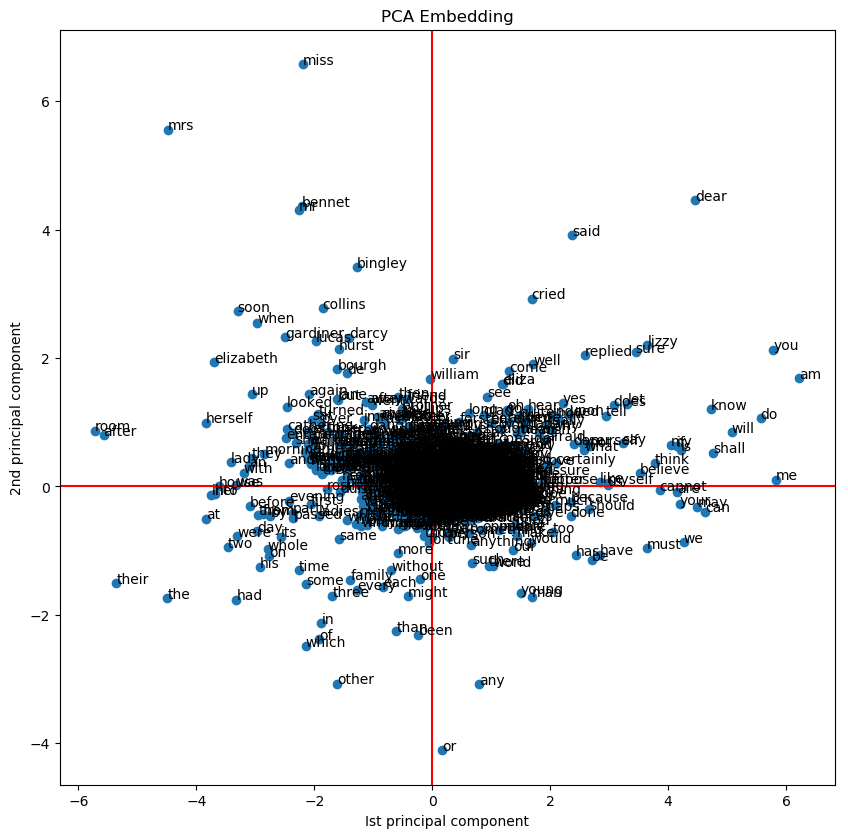

In [27]:
from sklearn import decomposition
import matplotlib.pyplot as plt

vocab_tmp = list(model.wv.vocab)
X = model[vocab_tmp]
# get two principle components of the feature space
pca= decomposition.PCA(n_components=2).fit_transform(X)

# set figure settings
plt.figure(figsize=(10,10),dpi=100)

# save pca values and vocab in dataframe df
df = pd.concat([pd.DataFrame(pca),pd.Series(vocab_tmp)],axis=1)
df.columns = ['x', 'y', 'word']
plt.xlabel("Ist principal component")
plt.ylabel('2nd principal component')
plt.title("PCA Embedding")
plt.scatter(x=df['x'], y=df['y'])
for i, word in enumerate(df['word']):
    plt.annotate(word, (df['x'].iloc[i], df['y'].iloc[i]))
plt.axhline(y=0, color='red')
plt.axvline(x=0, color='red')
plt.show()

In [28]:
print("Similarity (brother, sister): ", model.similarity('brother','sister'))
print("Similarity (happy, sad): ",model.similarity('mrs','mr'))
#print("Similarity (pride, prejudice): ",model.similarity('pride','prejudice'))
print("Similarity (house, home): ",model.similarity('house','home'))
print("Similarity (street, road): ",model.similarity('street','road'))

Similarity (brother, sister):  0.7390593845540169
Similarity (happy, sad):  0.8626088763938937
Similarity (house, home):  0.7597522440648551
Similarity (street, road):  0.9086862731058933


In [18]:
vocab_tmp = list(model.wv.vocab)
print('Vocab length:',len(vocab_tmp))

Vocab length: 1932
